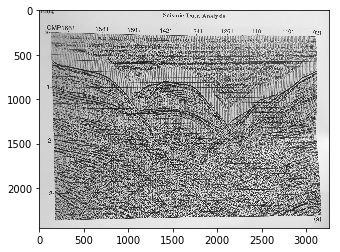

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

img = mpimg.imread('IMG_0236.JPG')     
gray = rgb2gray(img)    
plt.imshow(gray, cmap = plt.get_cmap('gray'))
plt.show()

In [23]:
# define migration
def mig(data,vel,dt,dx,dy=0,dz=0,t0=0,x0=0,z0=0,y0=0,nz=0,ny=0):
    nt = len(data)
    nx = len(data[1])
    if nz==0:
        nz = nt
        
    if ny == 0:
        ny = nx
    
    if dy == 0:
        dy=dx
        
    if dz == 0:
        dz = dt*vel/2
                
    global image
    image = np.zeros((nz,ny))
    # loop through indexes
    ix = 0
    while ix<nx:
        x = x0+ix*dx
        iy = 0

        while iy<ny:
            y = y0 + iy*dy
            h = (x-y)
            iz = 0
            while iz<nz:
                z = z0+iz*dz
                t = math.sqrt(z*z+h*h)*2./vel
            
            
                t1 = (t-t0)/dt
                ti = math.floor(t1)
                rt = t1-ti
                ti = int(ti)

                if ti>nt-2:
                    iz=iz+1
                    continue

                else:
                    image[iz,iy] = image[iz,iy] + (1-rt)*data[ti,ix] + rt*data[ti+1,ix]

                    iz = iz+1
    
            iy = iy+1
            #iy
    
        ix=ix+1
        #ix
    return 

In [24]:
# define modeling
def mod(image,vel,dz,dy,dx=0,dt=0,t0=0,x0=0,z0=0,y0=0,nt=0,nx=0):
    nz = len(image)
    ny = len(image[1])

    if nt==0:
        nt = nz
        
    if nx == 0:
        nx = ny
    
    if dy == 0:
        dy=dx
        
    if dt == 0:
        dt = dz/vel

    global data
    data = np.zeros((nt,nx))    
    
    # loop through indexes
    ix = 0
    while ix<nx:
        x = x0+ix*dx
        iy = 0

        while iy<ny:
            y = y0 + iy*dy
            h = (x-y)
            iz = 0
            while iz<nz:
                z = z0+iz*dz
                t = math.sqrt(z*z+h*h)*2./vel
            
            
                t1 = (t-t0)/dt
                ti = math.floor(t1)
                rt = t1-ti
                ti = int(ti)

                if ti>nt-2:
                    iz=iz+1
                    continue

                else:
                    data[ti,ix] = data[ti,ix] + (1-rt)*image[iz,iy]
                    data[ti+1,ix] = data[ti+1,ix] + rt*image[iz,iy]

                    iz = iz+1
    
            iy = iy+1
            #iy
    
        ix=ix+1
        #ix
    return 
    



In [ ]:
mig(gray,1,1,1,1)

In [ ]:
)